In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data_summary.csv")

In [7]:
df["proposed_label"].value_counts(dropna=False)

proposed_label
pass       698
enter      494
unknown     19
Name: count, dtype: int64

In [ ]:
# Quick overview
print("----- BASIC INFO -----")
print(df.info())
print("\n----- HEAD -----")
print(df.head())

# Summary statistics for numeric columns
print("\n----- NUMERIC SUMMARY -----")
print(df.describe())

# Count of videos per session
print("\n----- VIDEOS PER SESSION -----")
print(df['session'].value_counts())

# Count of proposed vs true labels
print("\n----- LABEL DISTRIBUTION -----")
print(df['proposed_label'].value_counts())
print(df['true_label'].value_counts())

# Count of flagged videos
print("\n----- FLAGGED VIDEOS -----")
print(df['flag'].value_counts())

# ----------




----- BASIC INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session         1211 non-null   object 
 1   video_name      1211 non-null   object 
 2   folder_path     1211 non-null   object 
 3   proposed_label  1211 non-null   object 
 4   true_label      0 non-null      float64
 5   flag            0 non-null      float64
 6   duration_s      1207 non-null   float64
 7   fps             1207 non-null   float64
 8   n_frames        1207 non-null   float64
 9   avg_people      1207 non-null   float64
 10  max_people      1207 non-null   float64
dtypes: float64(7), object(4)
memory usage: 104.2+ KB
None

----- HEAD -----
            session                      video_name  \
0  live_output_10_1   20251001_125855_id3_enter.mp4   
1  live_output_10_1   20251001_125917_id6_enter.mp4   
2  live_output_10_1   20251001_125947_id7_e

Text(0.5, 1.0, 'Distribution of Video Lengths (in Frames)')

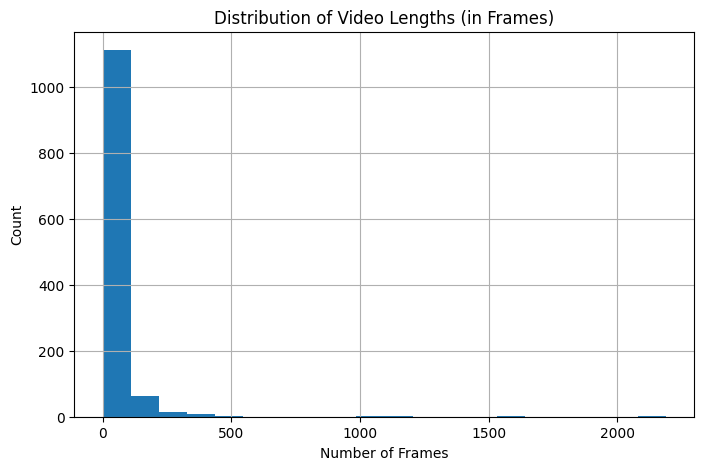

In [12]:
# Optional: histogram of number of frames
ax = df['n_frames'].hist(bins=20, figsize=(8,5))

ax.set_xlabel("Number of Frames")
ax.set_ylabel("Count")
ax.set_title("Distribution of Video Lengths (in Frames)")

In [15]:
print("----- BASIC COUNTS -----")
print("Total videos:", len(df))
print(df["proposed_label"].value_counts())

print("\n----- FRAME STATISTICS -----")
print("Average frames per video:", df["n_frames"].mean())
print("Min frames per video:", df["n_frames"].min())
print("Max frames per video:", df["n_frames"].max())


----- BASIC COUNTS -----
Total videos: 1211
proposed_label
pass       698
enter      494
unknown     19
Name: count, dtype: int64

----- FRAME STATISTICS -----
Average frames per video: 66.33471416735708
Min frames per video: 0.0
Max frames per video: 2190.0


In [24]:
df_filtered = df[
    (df["n_frames"] > 2) &
    (df["proposed_label"].isin(["pass", "enter"]))
]

# Quick overview
print("----- BASIC INFO -----")
print(df_filtered.info())
print("\n----- HEAD -----")
print(df_filtered.head())

# Summary statistics for numeric columns
print("\n----- NUMERIC SUMMARY -----")
print(df_filtered.describe())

# Count of videos per session
print("\n----- VIDEOS PER SESSION -----")
print(df_filtered['session'].value_counts())

# Count of proposed vs true labels
print("\n----- LABEL DISTRIBUTION -----")
print(df_filtered['proposed_label'].value_counts())
print(df_filtered['true_label'].value_counts())

# Count of flagged videos
print("\n----- FLAGGED VIDEOS -----")
print(df_filtered['flag'].value_counts())


print("-----------")

print("----- BASIC COUNTS -----")
print("Total videos:", len(df_filtered))
print(df_filtered["proposed_label"].value_counts())

print("\n----- FRAME STATISTICS -----")
print("Average frames per video:", df_filtered["n_frames"].mean())
print("Min frames per video:", df_filtered["n_frames"].min())
print("Max frames per video:", df_filtered["n_frames"].max())

print("\n----- PEOPLE STATISTICS -----")
print("Average people per video:", df_filtered["max_people"].mean())
print("Min people per video:", df_filtered["max_people"].min())
print("Max people per video:", df_filtered["max_people"].max())

print("\n----- Average people STATISTICS -----")
print("Average of the average of people per video:", df_filtered["avg_people"].mean())
print("Min average people per video:", df_filtered["avg_people"].min())
print("Max average people per video:", df_filtered["avg_people"].max())

----- BASIC INFO -----
<class 'pandas.core.frame.DataFrame'>
Index: 1159 entries, 4 to 1194
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session         1159 non-null   object 
 1   video_name      1159 non-null   object 
 2   folder_path     1159 non-null   object 
 3   proposed_label  1159 non-null   object 
 4   true_label      0 non-null      float64
 5   flag            0 non-null      float64
 6   duration_s      1159 non-null   float64
 7   fps             1159 non-null   float64
 8   n_frames        1159 non-null   float64
 9   avg_people      1159 non-null   float64
 10  max_people      1159 non-null   float64
dtypes: float64(7), object(4)
memory usage: 108.7+ KB
None

----- HEAD -----
            session                      video_name  \
4  live_output_10_2  20251001_130119_id13_enter.mp4   
5  live_output_10_2  20251001_130147_id17_enter.mp4   
6  live_output_10_2  20251001_130148_id18_enter.

Text(0.5, 1.0, 'Distribution of Video Lengths (in Frames)')

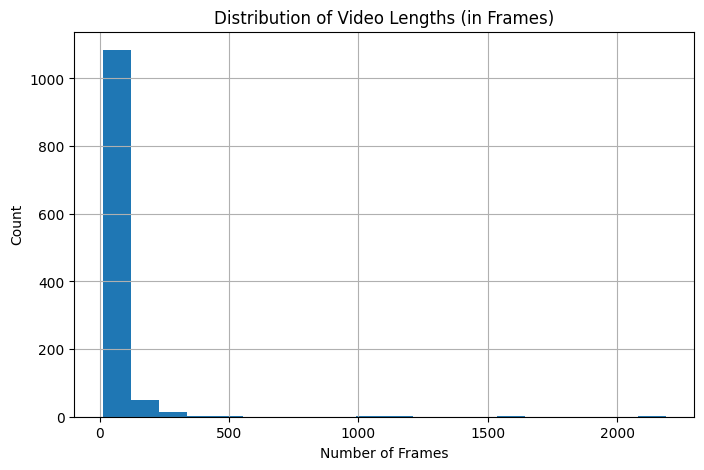

In [17]:
# Optional: histogram of number of frames
ax = df_filtered['n_frames'].hist(bins=20, figsize=(8,5))

ax.set_xlabel("Number of Frames")
ax.set_ylabel("Count")
ax.set_title("Distribution of Video Lengths (in Frames)")

Text(0.5, 1.0, 'Distribution of Video Lengths (in Frames)')

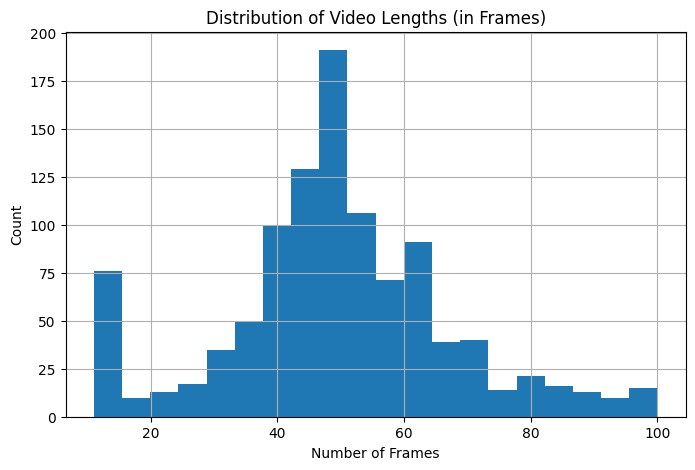

In [19]:
df_truncated = df_filtered[df_filtered["n_frames"] <= 100]

ax = df_truncated['n_frames'].hist(bins=20, figsize=(8,5))

ax.set_xlabel("Number of Frames")
ax.set_ylabel("Count")
ax.set_title("Distribution of Video Lengths (in Frames)")

In [ ]:
ax = df_filtered['n_frames'].hist(bins=20, figsize=(8,5))

ax.set_xlabel("Number of Frames")
ax.set_ylabel("Count")
ax.set_title("Distribution of Video Lengths (in Frames)")

In [37]:
df_ = df_filtered[df_filtered["n_frames"] > 40]

In [31]:
df_filtered

,session,video_name,folder_path,proposed_label,true_label,flag,duration_s,fps,n_frames,avg_people,max_people
4,live_output_10_2,20251001_130119_id13_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,12.31,13.0,160.0,1.64,2.0
5,live_output_10_2,20251001_130147_id17_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,26.50,12.0,318.0,1.30,3.0
6,live_output_10_2,20251001_130148_id18_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,6.85,13.0,89.0,1.87,2.0
7,live_output_10_2,20251001_130218_id25_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,1.73,11.0,19.0,0.84,2.0
8,live_output_10_2,20251001_130219_id26_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,5.70,10.0,57.0,0.82,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1190,live_output_test,20251001_121818_id13_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,5.50,14.0,77.0,0.88,1.0
1191,live_output_test,20251001_121824_id15_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,3.17,12.0,38.0,0.76,1.0
1192,live_output_test,20251001_121835_id17_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,11.07,14.0,155.0,0.94,2.0
1193,live_output_test,20251001_122100_id1_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,2.83,30.0,85.0,0.84,2.0


In [ ]:
df_

,session,video_name,folder_path,proposed_label,true_label,flag,duration_s,fps,n_frames,avg_people,max_people
4,live_output_10_2,20251001_130119_id13_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,12.31,13.0,160.0,1.64,2.0
5,live_output_10_2,20251001_130147_id17_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,26.50,12.0,318.0,1.30,3.0
6,live_output_10_2,20251001_130148_id18_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,6.85,13.0,89.0,1.87,2.0
8,live_output_10_2,20251001_130219_id26_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,5.70,10.0,57.0,0.82,2.0
10,live_output_10_2,20251001_130801_id46_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,134.67,12.0,1616.0,1.97,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1184,live_output_sync,20251001_114722_id1_pass.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,pass,NaN,NaN,6.86,14.0,96.0,0.93,2.0
1189,live_output_test,20251001_121757_id6_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,4.38,13.0,57.0,0.81,2.0
1190,live_output_test,20251001_121818_id13_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,5.50,14.0,77.0,0.88,1.0
1192,live_output_test,20251001_121835_id17_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,11.07,14.0,155.0,0.94,2.0


: 

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
df_filtered["max_people"].dropna().astype(float).hist(bins=20)
plt.title("Max People in Frame Count Distribution")
plt.xlabel("Max People Count")
plt.ylabel("Count")

In [25]:
print("\n----- FRAME STATISTICS -----")
print("Average frames per video:", df_truncated["n_frames"].mean())
print("Min frames per video:", df_truncated["n_frames"].min())
print("Max frames per video:", df_truncated["n_frames"].max())


----- FRAME STATISTICS -----
Average frames per video: 49.385998107852416
Min frames per video: 11.0
Max frames per video: 100.0


In [20]:
df

,session,video_name,folder_path,proposed_label,true_label,flag,duration_s,fps,n_frames,avg_people,max_people
0,live_output_10_1,20251001_125855_id3_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,live_output_10_1,20251001_125917_id6_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,live_output_10_1,20251001_125947_id7_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,live_output_10_1,20251001_130022_id8_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,live_output_10_2,20251001_130119_id13_enter.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,enter,NaN,NaN,12.31,13.0,160.0,1.64,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1206,live_output_test,20251001_115755_id6.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,unknown,NaN,NaN,1.93,14.0,27.0,0.96,1.0
1207,live_output_test,20251001_115757_id7.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,unknown,NaN,NaN,0.25,12.0,3.0,1.33,2.0
1208,live_output_test,20251001_115841_id1.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,unknown,NaN,NaN,50.00,1.0,50.0,1.00,2.0
1209,live_output_test,20251001_120517_id1.mp4,C:/Users/hanna/Documents/Thesis/data\live_outp...,unknown,NaN,NaN,8.15,13.0,106.0,0.80,1.0
